In [1]:
# "Tab" = shows all the executable operation with the variable object

# "Right Ctrl + Enter" = keyboard shortcut for run In[] in python

In [1]:
# Importing the libraries for use

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
# from sklearn import metrics
# from sklearn.metrics import recall_score
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [85]:
# Loading the Dataset

data = pd.read_csv("telecom_customer_churn.csv")
data # shows all records (number of rows and columns)
data.head() # starting 5 rows

,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code,Latitude,Longitude,Number_of_Referrals,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [86]:
data.size # all cells in sheet
print(type(data.size)) # shows datatype
data.shape # shows number of rows and columns in dimensions
print(data.shape)
data.describe() # gives the description of all data

<class 'numpy.int32'>
(7043, 38)


,Age,Number_of_Dependents,Zip_Code,Latitude,Longitude,Number_of_Referrals,Tenure_in_Months,Avg _Monthly_Long_Distance_Charges,Avg _Monthly _GB_Download,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [87]:
data["Customer_Status"].unique()

array(['Stayed', 'Churned', 'Joined'], dtype=object)

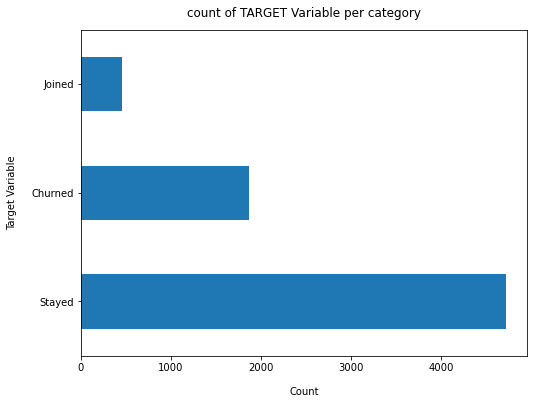

In [88]:
data['Customer_Status'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("count of TARGET Variable per category", y=1.02);

In [89]:
data['Customer_Status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer_Status, dtype: int64

In [90]:
100*data['Customer_Status'].value_counts()/len(data['Customer_Status'])

Stayed     67.016896
Churned    26.536987
Joined      6.446117
Name: Customer_Status, dtype: float64

In [91]:
data.info() # full detailes like (count of non-null values and datatype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Customer_ID                         7043 non-null   object 
 1   Gender                              7043 non-null   object 
 2   Age                                 7043 non-null   int64  
 3   Married                             7043 non-null   object 
 4   Number_of_Dependents                7043 non-null   int64  
 5   City                                7043 non-null   object 
 6   Zip_Code                            7043 non-null   int64  
 7   Latitude                            7043 non-null   float64
 8   Longitude                           7043 non-null   float64
 9   Number_of_Referrals                 7043 non-null   int64  
 10  Tenure_in_Months                    7043 non-null   int64  
 11  Offer                               7043 no

In [92]:
data.isnull().sum()

Customer_ID                              0
Gender                                   0
Age                                      0
Married                                  0
Number_of_Dependents                     0
City                                     0
Zip_Code                                 0
Latitude                                 0
Longitude                                0
Number_of_Referrals                      0
Tenure_in_Months                         0
Offer                                    0
Phone_Service                            0
Avg _Monthly_Long_Distance_Charges     682
Multiple_Lines                         682
Internet_Service                         0
Internet_Type                         1526
Avg _Monthly _GB_Download             1526
Online_Security                       1526
Online_Backup                         1526
Device_Protection_Plan                1526
Premium_Tech_Support                  1526
Streaming_TV                          1526
Streaming_M

C:\Users\pralay kalaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


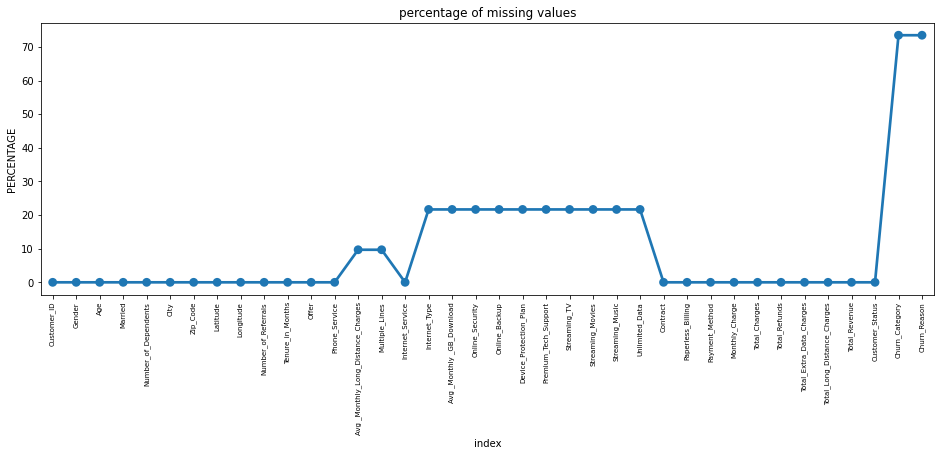

In [93]:
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation = 90, fontsize = 7)
plt.title("percentage of missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [94]:
# just to verify that showing null values count is true.
# null in excel sheet = [N]+[O]+[Q]+[R]+[S]+[T]+[U]+[V]+[W]+[X]+[Y]+[Z]+[AK]+[AL]

data.loc[data['Avg _Monthly_Long_Distance_Charges'].isnull() == True]

# you can change the name ('Avg _Monthly_Long_Distance_Charges') to ('columun names which are haning null values')

,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code,Latitude,Longitude,Number_of_Referrals,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
10,0017-DINOC,Male,47,No,0,Rancho Santa Fe,92091,32.993560,-117.207121,0,...,Credit Card,45.20,2460.55,0.0,0,0.0,2460.55,Stayed,NaN,NaN
14,0019-GFNTW,Female,39,No,0,Los Olivos,93441,34.704340,-120.026090,0,...,Bank Withdrawal,45.05,2560.10,0.0,0,0.0,2560.10,Stayed,NaN,NaN
16,0020-JDNXP,Female,52,Yes,1,Point Reyes Station,94956,38.060264,-122.830646,0,...,Credit Card,61.25,1993.20,0.0,0,0.0,1993.20,Stayed,NaN,NaN
19,0023-HGHWL,Male,67,No,0,Morgan Hill,95037,37.161544,-121.649371,0,...,Bank Withdrawal,25.10,25.10,0.0,0,0.0,25.10,Churned,Competitor,Competitor made better offer
25,0032-PGELS,Female,37,Yes,1,Palomar Mountain,92060,33.309852,-116.823091,1,...,Bank Withdrawal,30.50,30.50,0.0,0,0.0,30.50,Churned,Attitude,Attitude of service provider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,9906-NHHVC,Female,75,No,0,Macdoel,96058,41.769709,-121.920630,0,...,Bank Withdrawal,53.50,3517.90,0.0,0,0.0,3517.90,Stayed,NaN,NaN
6980,9907-SWKKF,Female,69,No,0,Twain,95984,40.022184,-121.062384,0,...,Credit Card,25.05,25.05,0.0,0,0.0,25.05,Churned,Competitor,Competitor had better devices
6996,9928-BZVLZ,Female,58,No,0,Sunset Beach,90742,33.719221,-118.073596,0,...,Credit Card,49.85,552.10,0.0,0,0.0,552.10,Stayed,NaN,NaN
7016,9955-QOPOY,Male,23,Yes,0,Sunnyvale,94089,37.421633,-122.009613,7,...,Credit Card,60.80,4263.40,0.0,0,0.0,4263.40,Stayed,NaN,NaN


In [95]:
# Missing values treatment
# removing missing values
# data.dropna(how = 'any', inplace = True)


# in this particular dataframe any column which will be having null values or NA values will be filled up with zero
# data.fillna(0) 

In [96]:
# for removing the whole column
# data.drop(columns = '','' axiss=1, inplace=True)

In [97]:
# Split the data into features(X) and target variable(y)

X = data.drop('Customer_Status',axis=1)
y = data['Customer_Status']

In [98]:
X.head()

,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code,Latitude,Longitude,Number_of_Referrals,...,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Churn_Category,Churn_Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Dissatisfaction,Network reliability


In [99]:
y.head()

0     Stayed
1     Stayed
2    Churned
3    Churned
4    Churned
Name: Customer_Status, dtype: object

In [100]:
# Encode categorical data variables
# Text/String convertion into numeric format

label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# X_encoded.head()

In [101]:
#split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [102]:
X_train.shape
print(X_train.shape)
X_test.shape
print(X_test.shape)

(5634, 37)
(1409, 37)


In [103]:
# initialize the model

pralay = DecisionTreeClassifier()

In [104]:
# Train the model

pralay.fit(X_train, y_train)

DecisionTreeClassifier()

In [105]:
# make Predictions on the test set

y_pred = pralay.predict(X_test)

In [109]:
#y_pred

In [110]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of model :-", accuracy)
#print("Accuracy of model :-", accuracy*100,"%")

Accuracy of model :- 1.0
